# WORLD HAPPINESS CLUSTERING

👉 This study will examine the dataset named as **"World Happiness Report"**  at Kaggle website [external link text](https://www.kaggle.com/datasets/unsdsn/world-happiness).

**Happiness scored according to economic production, social support,etc.**
The scores are from nationally representative samples for the years **2013-2016** and use the Gallup weights to make the estimates representative. The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.
Dystopia is an imaginary country that has the world’s least-happy people

# Data Analysis

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option('display.max_columns',100)
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [72]:
df=pd.read_csv('World Happiness Report 2022.csv')
df = df.drop(df.columns[0], axis=1)


In [73]:
df.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419


In [74]:
df.isnull().sum()

RANK                                          0
Country                                       0
Happiness score                               0
Whisker-high                                  0
Whisker-low                                   0
Dystopia (1.83) + residual                    0
Explained by: GDP per capita                  0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
dtype: int64

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   RANK                                        146 non-null    int64  
 1   Country                                     146 non-null    object 
 2   Happiness score                             146 non-null    float64
 3   Whisker-high                                146 non-null    float64
 4   Whisker-low                                 146 non-null    float64
 5   Dystopia (1.83) + residual                  146 non-null    float64
 6   Explained by: GDP per capita                146 non-null    float64
 7   Explained by: Social support                146 non-null    float64
 8   Explained by: Healthy life expectancy       146 non-null    float64
 9   Explained by: Freedom to make life choices  146 non-null    float64
 10  Explained by: 

In [76]:
df[df['Country']=='Turkey']

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
111,112,Turkey,4.744,4.845,4.644,1.059,1.707,0.865,0.702,0.209,0.087,0.115


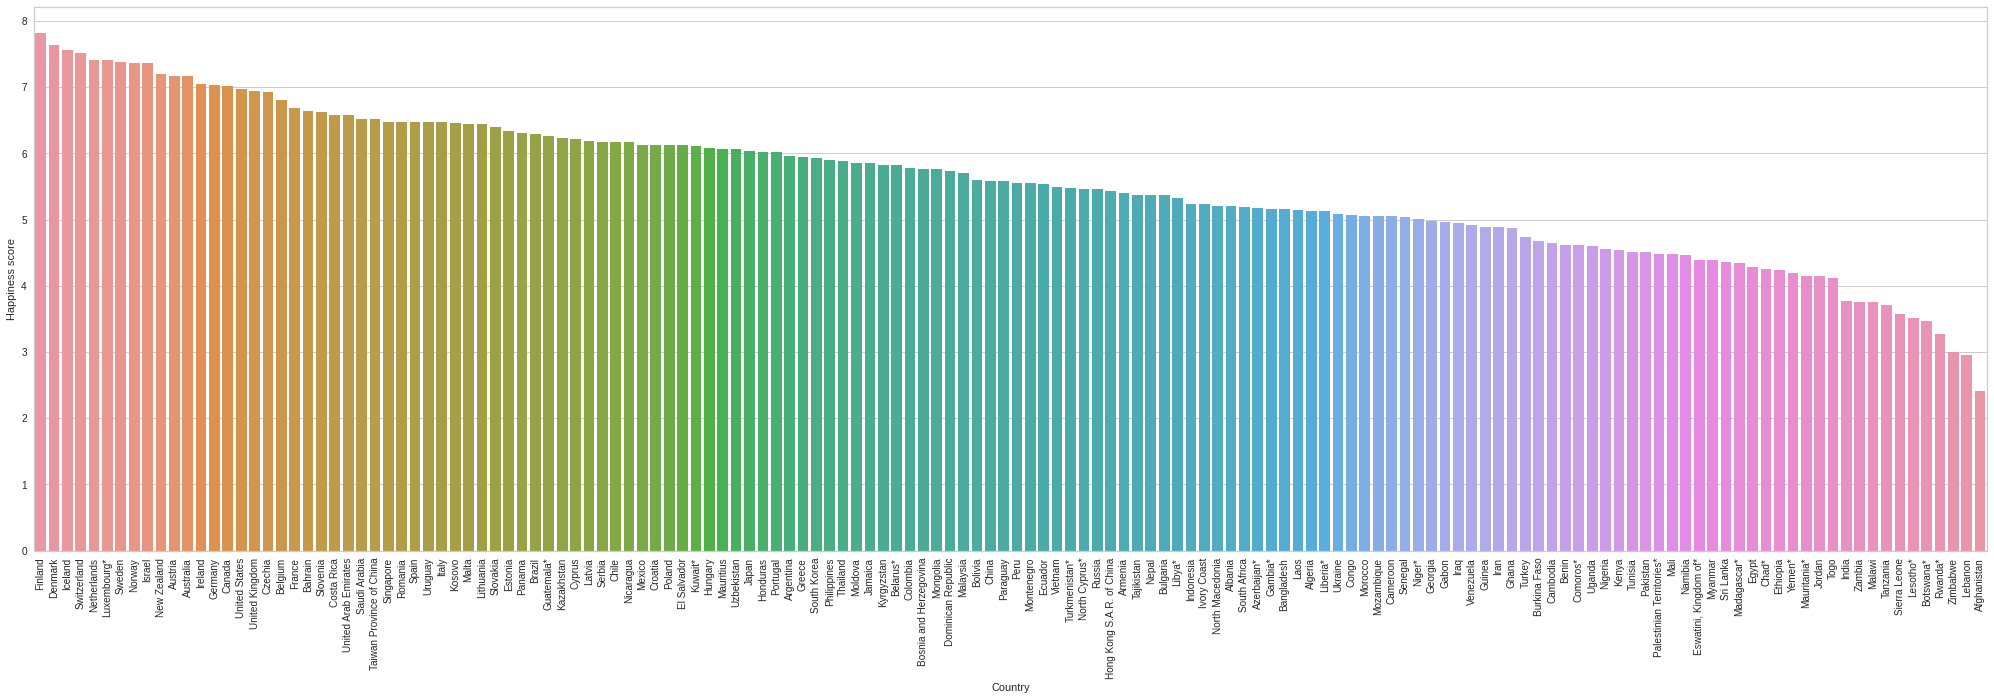

In [77]:
plt.figure(figsize=(35,10))
sns.barplot(data=df,x="Country",y="Happiness score")
plt.xticks(rotation=90) 
plt.show()

In [78]:
df.columns

Index(['RANK', 'Country', 'Happiness score', 'Whisker-high', 'Whisker-low',
       'Dystopia (1.83) + residual', 'Explained by: GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption'],
      dtype='object')

In [79]:
#The data to be clustered except the unique value "Country".

x=df.drop('Country',axis=1)  

In [80]:
x.head()

,RANK,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419


In [81]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   RANK                                        146 non-null    int64  
 1   Happiness score                             146 non-null    float64
 2   Whisker-high                                146 non-null    float64
 3   Whisker-low                                 146 non-null    float64
 4   Dystopia (1.83) + residual                  146 non-null    float64
 5   Explained by: GDP per capita                146 non-null    float64
 6   Explained by: Social support                146 non-null    float64
 7   Explained by: Healthy life expectancy       146 non-null    float64
 8   Explained by: Freedom to make life choices  146 non-null    float64
 9   Explained by: Generosity                    146 non-null    float64
 10  Explained by: 

# Clustering Model

In [82]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [83]:
allscore=[]
allclusters=[]
sum_of_squared_distances=[]
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
            no_of_cluster+=1
            model=KMeans(n_clusters=no_of_cluster)
            #model=model.fit()
            pred=model.fit_predict(x)
            sum_of_squared_distances.append(model.inertia_)
            score=silhouette_score(x,pred)
            print("Number of cluster {}, silhouette {}".format(no_of_cluster,score))
            allscore.append(score)
            allclusters.append(no_of_cluster)
        
clust(9)

Number of cluster 2, silhouette 0.6210331031988108
Number of cluster 3, silhouette 0.5807036603351202
Number of cluster 4, silhouette 0.5581860336732645
Number of cluster 5, silhouette 0.5435871376552982
Number of cluster 6, silhouette 0.5317200512171204
Number of cluster 7, silhouette 0.522868055307161
Number of cluster 8, silhouette 0.5133009677478693
Number of cluster 9, silhouette 0.5073837607643239


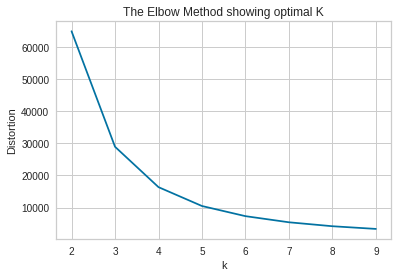

In [84]:
plt.plot(allclusters,sum_of_squared_distances,marker='x')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing optimal K')
plt.show()

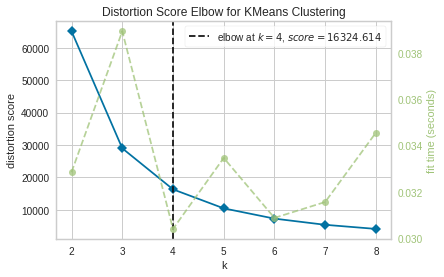

In [85]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(x)        
visualizer.show();

In [86]:
model=KMeans(n_clusters=4)
model=model.fit(x)
tahmin=model.predict(x)

In [87]:
silhouette_score(x,pred)

0.5583354973401999

In [88]:
x['cluster']=pred

In [89]:
x.head()

,RANK,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,cluster
0,1,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534,0
1,2,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532,0
2,3,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191,0
3,4,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461,0
4,5,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419,0


In [91]:
cluster_description = ({0 : 'Happiest', 
                        1 : 'Unhappy',
                        2 : 'Unhappiest',
                        3 : 'Happy'})

In [93]:
x['cluster description'] =x['cluster'].map(cluster_description)
x.head()

,RANK,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,cluster,cluster description
0,1,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534,0,Happiest
1,2,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532,0,Happiest
2,3,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191,0,Happiest
3,4,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461,0,Happiest
4,5,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419,0,Happiest


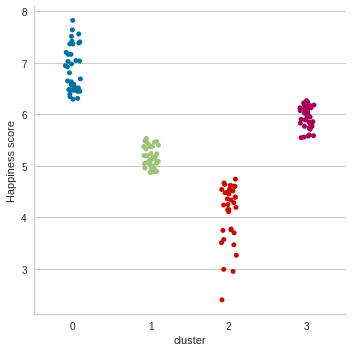

In [94]:
sns.catplot(x="cluster", y="Happiness score", data=x)